# Titanic dataset Feature Engineering

## Create other features from existing ones

## Data description 

In [11]:
traindata <- read.csv('c5_train.csv', stringsAsFactors = F) #stringsAsFactors parameter : to not convert string values into categorical values
testdata <- read.csv('c5_test.csv', stringsAsFactors = F)
head(traindata)
summary(traindata)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

## Step 1. Import packages

In [3]:
install.packages('ggplot2') ; library('ggplot2')
install.packages('ggthemes') ; library('ggthemes')
install.packages('scales') ; library('scales')
install.packages('dplyr') ; library('dplyr')
install.packages('mice') ; library('mice')  #use for handling missing data
install.packages('randomForest') ; library('randomForest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘ucminf’, ‘numDeriv’, ‘lme4’, ‘ordinal’, ‘pan’, ‘jomo’, ‘mitml’

Loading required package: lattice

Attaching package: ‘mice’

The following objects are masked from ‘package:base’:

    cbind, rbind

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
randomForest 4.6-14
Type rfNews() to see new 

## Step 2. Construct full dataset

There are two given datasets, one is train dataset and another is test dataset.\
Using bind_rows function, we will merge these datasets to full dataset.

In [98]:
titanic_dataset <- bind_rows(traindata,testdata)
head(titanic_dataset)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


## Step 3. Title extraction
\
Look carefully at the names of passengers. You can see, that there are different titles in these names.


#### 1. Why do you think it is important?
The title are important because it can help us check if there is no error in the sex feature.

#### 2. Use regular expressions to grab titles from passenger names and put into new title column in the table

In [99]:
?gsub
# pat <- '[Mm][irs\\.][s\\.]*\\s' ; titanic_dataset$Name <- gsub(pattern = pat, replacement='', x=titanic_dataset$Name, ignore.case=TRUE)
# the line code above is not necessary as we don't need to remove the title from the name feature
titanic_dataset$title <- gsub(pattern = '(.*,\\s)|(\\..*)', replacement='', x=titanic_dataset$Name)
head(titanic_dataset)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,Mr
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,Mr


#### 3. Which data should you use for this: test, train or full dataset
We want to use the full dataset because we need it to be fully clean and well structured.


#### 4. For each title and gender, show the number of persons

In [100]:
table(titanic_dataset$Sex, titanic_dataset$title)

        
         Capt Col Don Dona  Dr Jonkheer Lady Major Master Miss Mlle Mme  Mr Mrs
  female    0   0   0    1   1        0    1     0      0  260    2   1   0 197
  male      1   4   1    0   7        1    0     2     61    0    0   0 757   0
        
          Ms Rev Sir the Countess
  female   2   0   0            1
  male     0   8   1            0

We have a lot of Title. The Name column doesn't say much, the title Yes.\
We can assume that someone with Title **captain** have more chance to survive that just a given name.

## Step 4. Merge of titles

#### 1. Do you think it is usefull to keep all the titles? For example, there is only one capitan, sir...

#### 2. Decide which titles are rare and merge them to one group.
We can merge different titles as there are traduction in french of english title. For instance: **Mrs and Mme, Miss and Mlle** etc.\
Also some rare titles as Capt, Don etc can be put in a specific title.


In [101]:
titanic_dataset[titanic_dataset=='Mme'] <- 'Mrs'
titanic_dataset[titanic_dataset=='Mlle' | titanic_dataset=='Ms'] <- 'Miss'

rare_title <- c('Lady','Sir','Don','Jonkheer','Col','Capt','the Countess','Dona','Major','Dr','Rev')
titanic_dataset$title[titanic_dataset$title %in% rare_title] <- 'Rare Title'

tail(titanic_dataset)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>
1304,1304,NA,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,,S,Miss
1305,1305,NA,3,"Spector, Mr. Woolf",male,NA,0,0,A.5. 3236,8.0500,,S,Mr
1306,1306,NA,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Rare Title
1307,1307,NA,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,,S,Mr
1308,1308,NA,3,"Ware, Mr. Frederick",male,NA,0,0,359309,8.0500,,S,Mr
1309,1309,NA,3,"Peter, Master. Michael J",male,NA,1,1,2668,22.3583,,C,Master


#### 3. For each title and gender show the number of persons.

In [102]:
table(titanic_dataset$Sex, titanic_dataset$title)

        
         Master Miss  Mr Mrs Rare Title
  female      0  264   0 198          4
  male       61    0 757   0         25

## Step 5. Family matters

#### 1. If we have surnames of persons, it is useful to use this information
Maybe.


#### 2. Extract family names, using function strsplit() and function sapply to apply it to all elements of the table.

In [115]:
titanic_dataset$Surname <- sub(",.*", replacement = "", titanic_dataset$Name)
#head(unlist(strsplit(titanic_dataset$Name, ',')))
head(titanic_dataset)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,Surname
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,Mr,Braund
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,Miss,Heikkinen
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs,Futrelle
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,Mr,Allen
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,Mr,Moran


#### 3. Create new variable named Fsize with family size.


In [138]:
#countF <- function(x){ length(grep(x, titanic_dataset$Surname))}
#titanic_dataset$Fsize <-  sapply(titanic_dataset$Surname, countF)

## or just use directly the existing features SibSp (siblings) and Parch (it's more reliable than counting the occurences)
titanic_dataset$Fsize <- titanic_dataset$SibSp + titanic_dataset$Parch + 1

head(titanic_dataset)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,Surname,Fsize
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,Mr,Braund,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,2
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,Miss,Heikkinen,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs,Futrelle,2
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,Mr,Allen,1
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,Mr,Moran,1


#### x.

In [141]:
titanic_dataset$Family <- paste(titanic_dataset$Surname, '_', titanic_dataset$Fsize)
head(titanic_dataset)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,Surname,Fsize,Family
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,Mr,Braund,2,Braund _ 2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,2,Cumings _ 2
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,Miss,Heikkinen,1,Heikkinen _ 1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs,Futrelle,2,Futrelle _ 2
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,Mr,Allen,1,Allen _ 1
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,Mr,Moran,1,Moran _ 1


## Step 6. Visualisation family/survival

#### 1. Investigate if there is relationship between family size and survival.
**Use ggplot2 library to plot bar**

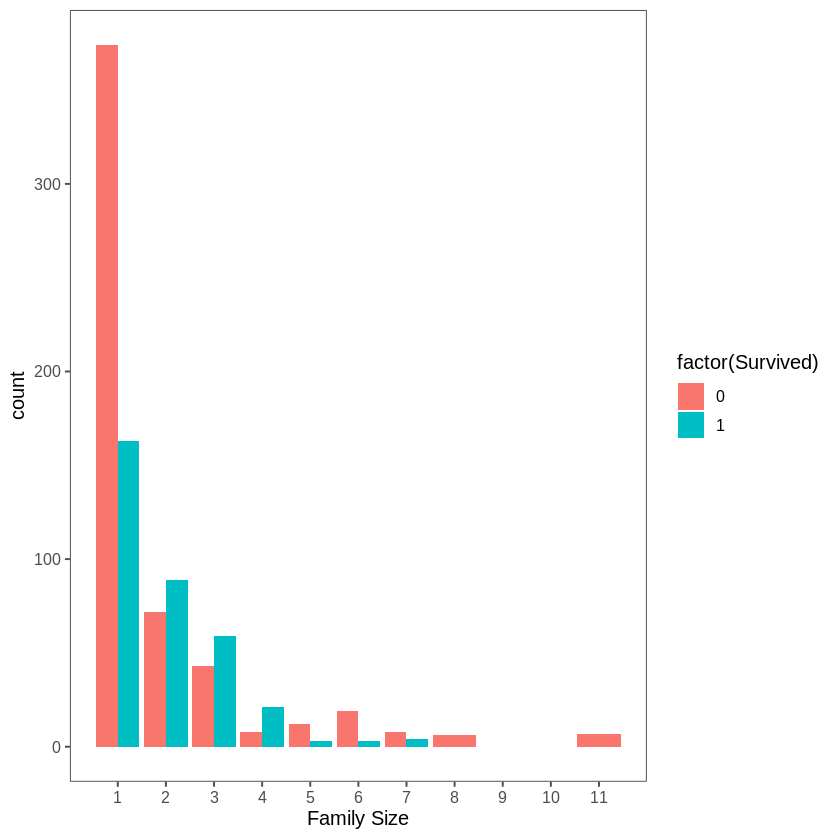

In [163]:
ggplot(titanic_dataset[1:891,],aes(x=Fsize, fill=factor(Survived)))+
geom_bar(stat='count', position='dodge')+
scale_x_continuous(breaks=c(1:11))+
labs(x='Family Size')+
theme_few() # remove grid

#### 3. What inference can you get?
We can say that if we are alone or you have big family, you are more likely to die. But if you have medium size family (2 to 4), you have more chance to survive.

#### x.
